In [36]:
import tensorflow as tf
import os
import pandas as pd
import strym
from strym import strymread
import matplotlib.pyplot as plt
from pylab import rcParams
import strym.DBC_Read_Tools as dbc
import numpy as np
from strym import strymmap
import keras
from keras import layers, Model

In [37]:
can_path = '../2020-12-02-00-00-49_5FNYF6H05HB089022_CAN_Messages.csv'
dbcfile = '../data/honda_pilot_2017.dbc'

In [38]:
r =strymread(csvfile=data_path)

[2021_06_28_15_15_47] (root) INFO: Vehicle model infered is honda-pilot-2017


In [39]:
r.speed().describe()

,Time,Message
count,1.876750e+05,187675.000000
mean,1.606868e+09,27.581803
std,5.162042e+02,31.687866
min,1.606867e+09,0.000000
25%,1.606868e+09,0.000000
50%,1.606868e+09,5.810000
75%,1.606869e+09,64.370000
max,1.606869e+09,82.810000


array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'Message'}>]], dtype=object)

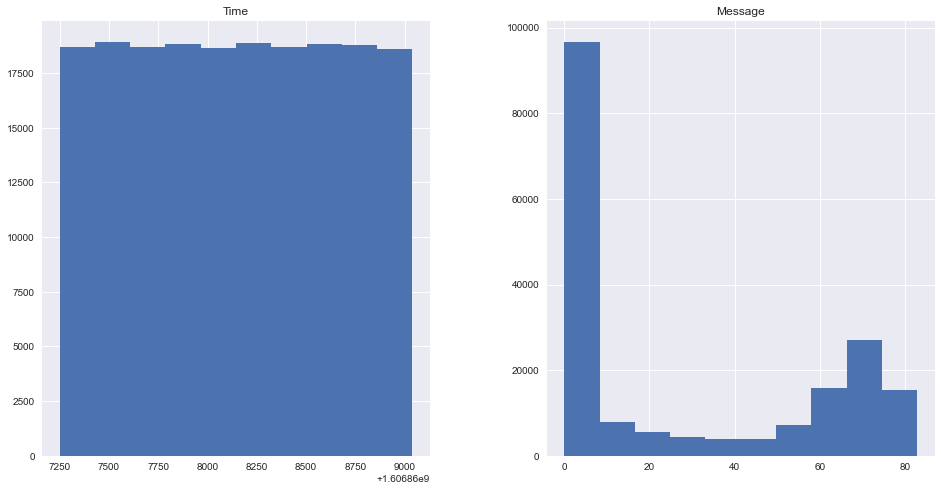

In [40]:
r.speed().hist()

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'Message'}>]], dtype=object)

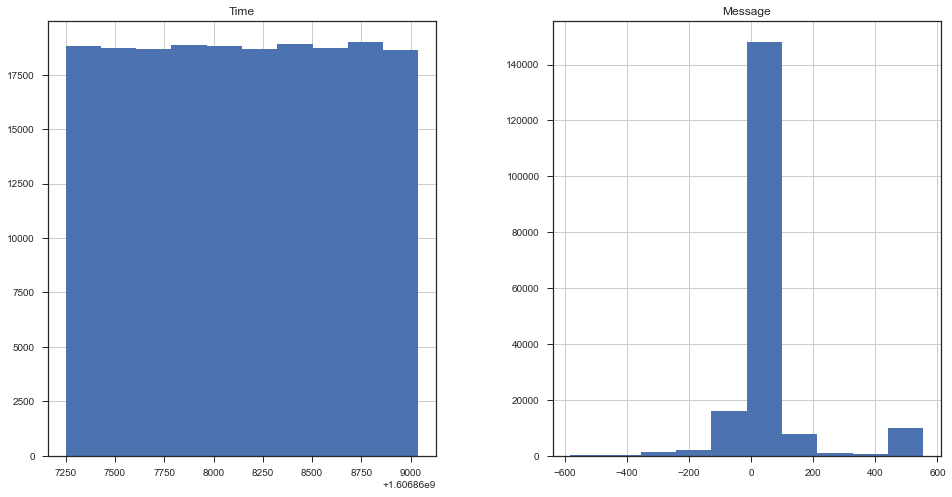

In [45]:
r.steer_angle().hist()

In [48]:
r.triptime()

1789.4963290691376

In [ ]:
debug_num_samples = 100
r_dataframe = r.dataframe[:debug_num_samples]

In [8]:
total_num_samples = r.size
num_train_samples = total_num_samples*9//10

features = ['Time', 'Bus', 'MessageID', 'Message', 'MessageLength']
labels = ['Time', 'Latitude', 'Longitude']
x_train_df = r_dataframe[features][:]
y_train_df = r_dataframe[labels][:]
x_test_df = r_dataframe[features][:]
y_test_df = r_dataframe[labels][:]

In [9]:
x_train = x_train_df.to_numpy()
y_train = y_train_df.to_numpy()
x_test = x_test_df.to_numpy()
y_test = y_test_df.to_numpy()

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(100, 5)
(100, 3)
(100, 5)
(100, 3)
